<a href="https://colab.research.google.com/github/atripathy86/MD/blob/main/notebook_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This notebook shows how to read in the existing images and corresponding ground truths (masks) from trajectories of *ab initio* molecular dynamics simulations performed on MoS2 with S defects.

## It also shows how to add image augmentations to replicate images that we get from STEM.

### Notebook prepared by Ayana Ghosh

Email: research.aghosh@gmail.com

Install package

In [ ]:
!pip install atomai

Import essential libraries

In [ ]:
import numpy as np
import os, re
import sys
import pandas as pd
import matplotlib.pyplot as plt
import atomai as aoi
np.random.seed(0)

In [ ]:
#data with no defects
!gdown https://drive.google.com/uc?id=1eYLaHsCoWywd4AFnljH3Vtu4A9C2jI2c
!gdown https://drive.google.com/uc?id=10GkPG3d_8OSR9QTTM0_pOTVrUYf4WNeX

Downloading...
From: https://drive.google.com/uc?id=1eYLaHsCoWywd4AFnljH3Vtu4A9C2jI2c
To: /content/cropped_masks_pristine.npy
100% 637M/637M [00:04<00:00, 158MB/s]
Downloading...
From: https://drive.google.com/uc?id=10GkPG3d_8OSR9QTTM0_pOTVrUYf4WNeX
To: /content/cropped_images_pristine.npy
100% 318M/318M [00:02<00:00, 144MB/s]


In [ ]:
cropped_img_pristine = np.load('/content/cropped_images_2500.npy')
cropped_mask_pristine = np.load('/content/cropped_masks_2500.npy')

(-0.5, 207.5, 207.5, -0.5)

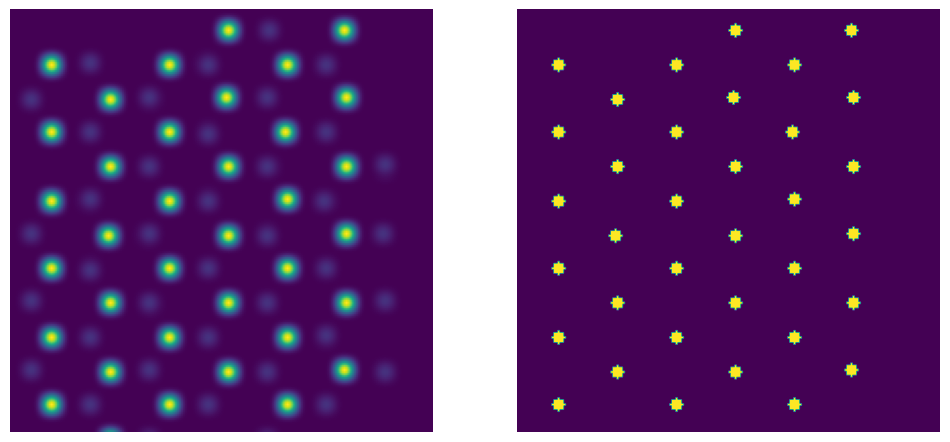

In [ ]:
#visualize the data

k = 0
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(cropped_img_pristine[k,:,:])
ax2.imshow(cropped_mask_pristine[k,:,:,1])
ax1.axis('off')
ax2.axis('off')

Augment data so that the trained models can generalize to real experimental data:

In [ ]:
#might scrash session. Therefore just showing example for a smaller dataset
cropped_img_pristine = cropped_img_pristine[:3]
cropped_mask_pristine = cropped_mask_pristine[:3]

dt = aoi.transforms.datatransform(1, # number of classes
                                  gauss_noise=[1000, 2000], # scaled values
                                  poisson_noise=[30, 45],
                                  blur=False,
                                  contrast=True,
                                  zoom=True,
                                  resize=[2, 1], # downsize all the images by a factor of 2
                                  seed=1)

X_train, y_train = dt.run(cropped_img_pristine, cropped_mask_pristine[..., None])

(-0.5, 207.5, 207.5, -0.5)

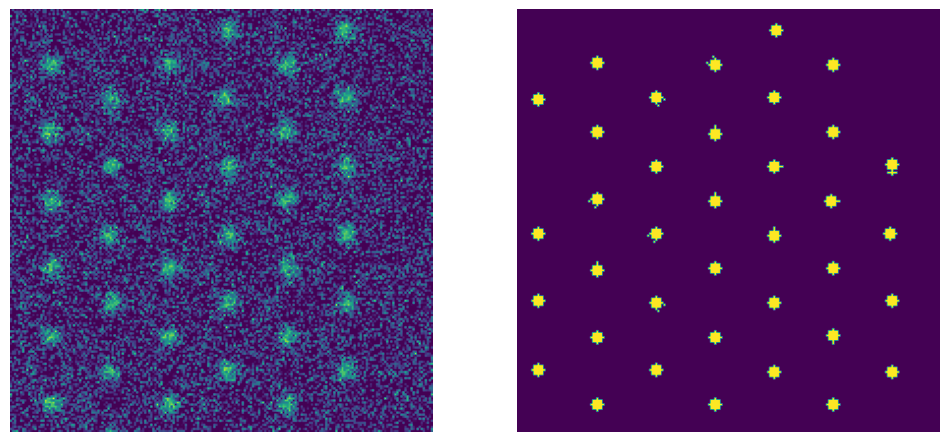

In [ ]:
#visualize the augmented data

k = 0
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(X_train[k,0])
ax2.imshow(y_train[k,:,:,0])
ax1.axis('off')
ax2.axis('off')

In [ ]:
#data with sulphur defects
!gdown https://drive.google.com/uc?id=196deVcixnSjoMb-NSpoT_BzUhvMwJBYy
!gdown https://drive.google.com/uc?id=1defVF5oiZefGFJk6Ispn8ODxcFH9NMm3

Downloading...
From: https://drive.google.com/uc?id=196deVcixnSjoMb-NSpoT_BzUhvMwJBYy
To: /content/cropped_masks_2500.npy
100% 6.32G/6.32G [00:41<00:00, 151MB/s]
Downloading...
From: https://drive.google.com/uc?id=1defVF5oiZefGFJk6Ispn8ODxcFH9NMm3
To: /content/cropped_images_2500.npy
100% 3.16G/3.16G [00:19<00:00, 166MB/s]


In [ ]:
cropped_img_defect_S = np.load('/content/cropped_images_2500.npy')
cropped_mask_defect_S = np.load('/content/cropped_masks_2500.npy')

(-0.5, 207.5, 207.5, -0.5)

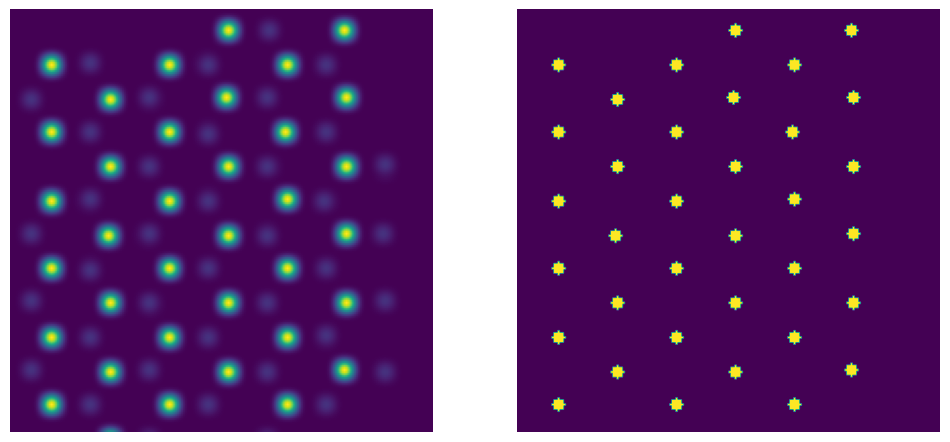

In [ ]:
#visualize the data

k = 0
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(cropped_img_defect_S[k,:,:])
ax2.imshow(cropped_mask_defect_S[k,:,:,1])
ax1.axis('off')
ax2.axis('off')

Augment data so that the trained models can generalize to real experimental data:

In [ ]:
#might scrash session. Therefore just showing example for a smaller dataset
cropped_img_defect_S = cropped_img_defect_S[:10]
cropped_mask_defect_S = cropped_mask_defect_S[:10]

dt = aoi.transforms.datatransform(1, # number of classes
                                  gauss_noise=[1000, 2000], # scaled values
                                  poisson_noise=[30, 45],
                                  blur=False,
                                  contrast=True,
                                  zoom=True,
                                  resize=[2, 1], # downsize all the images by a factor of 2
                                  seed=1)

X_train, y_train = dt.run(cropped_img_defect_S, cropped_mask_defect_S[..., None])

(-0.5, 207.5, 207.5, -0.5)

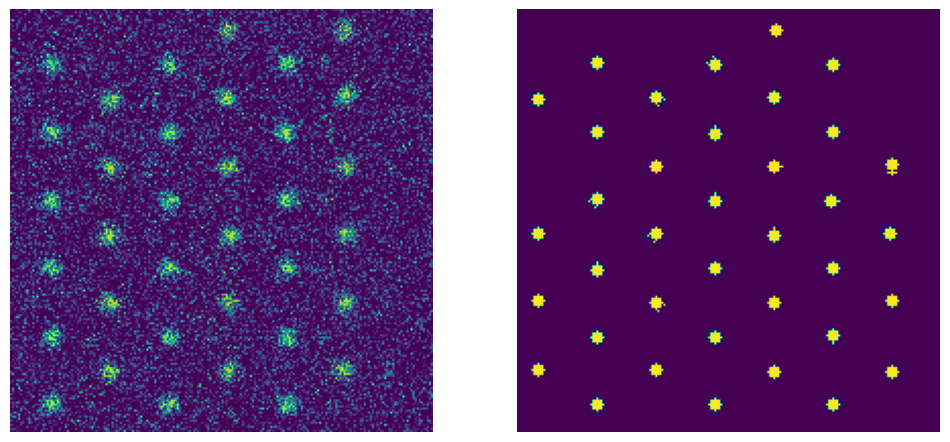

In [ ]:
#visualize the augmented data

k = 0
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(X_train[k,0])
ax2.imshow(y_train[k,:,:,0])
ax1.axis('off')
ax2.axis('off')

# Option II: Thoughts for active learning target directly from these images



# 1.   Find distances between neighboring atoms for both pristine and defect structures
# 2.   Or minimize or maximize structral similarity between the pristine and each defect structures


